# 銘柄のHLバンド、移動平均線、チャートを作成する

一つの銘柄の場合

In [ ]:
# ライブラリをインポート
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mplfinance as mpf
import yfinance as yf
from pandas_datareader import data as pdr
import datetime

In [ ]:
# Yahoo!ファイナンスのデータをpandas-datareaderで扱う
yf.pdr_override()

In [ ]:
# 銘柄のシンボル (米国株: META)
ticker_symbol = "META"

In [ ]:
# 銘柄のシンボル (日本株の場合は「銘柄コード+.T」)
# ticker_symbol = "6526.T"

In [ ]:
# 今日の日付を取得
today = datetime.date.today()

# 過去365日前の日付を取得
past_date = today - datetime.timedelta(days=365)

# 今日の日付を確認
print("Today:", today)

# 過去365日前の日付を確認
print("Past date:", past_date)

Today: 2024-05-11
Past date: 2023-05-12


In [ ]:
# データを取得 (日付、始値、高値、安値、終値、調整終値、出来高)
data = pdr.get_data_yahoo(ticker_symbol, start=str(past_date), end=str(today))

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# データの型を確認
print(type(data))

# データの行数と列数を確認
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(251, 6)


In [ ]:
# データを確認
display(data)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-12,236.740005,236.960007,231.449997,233.809998,233.562180,16155300
2023-05-15,236.919998,240.259995,235.330002,238.860001,238.606842,20653200
2023-05-16,235.789993,239.639999,235.520004,238.820007,238.566879,18163800
2023-05-17,238.449997,243.839996,238.139999,242.490005,242.232986,21193100
2023-05-18,241.300003,247.089996,241.190002,246.850006,246.588379,22943300
...,...,...,...,...,...,...
2024-05-06,455.579987,466.160004,453.339996,465.679993,465.679993,15094600
2024-05-07,466.290009,471.529999,461.309998,468.239990,468.239990,13406800
2024-05-08,463.500000,475.579987,463.000000,472.600006,472.600006,11683900


In [ ]:
# データコピーして、データフレームに設定
df = data.copy()

In [ ]:
# データの型を確認
print(type(df))

# データの行数と列数を確認
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(251, 6)


In [ ]:
# データフレームにインデックス名を設定
df.index.name = "date"

In [ ]:
# インデックスを日付に指定
date = df.index

In [ ]:
# 日付を昇順に並び替える
df.sort_index(inplace=True)

In [ ]:
# データを確認
display(df)

,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2023-05-12,236.740005,236.960007,231.449997,233.809998,233.562180,16155300
2023-05-15,236.919998,240.259995,235.330002,238.860001,238.606842,20653200
2023-05-16,235.789993,239.639999,235.520004,238.820007,238.566879,18163800
2023-05-17,238.449997,243.839996,238.139999,242.490005,242.232986,21193100
2023-05-18,241.300003,247.089996,241.190002,246.850006,246.588379,22943300
...,...,...,...,...,...,...
2024-05-06,455.579987,466.160004,453.339996,465.679993,465.679993,15094600
2024-05-07,466.290009,471.529999,461.309998,468.239990,468.239990,13406800
2024-05-08,463.500000,475.579987,463.000000,472.600006,472.600006,11683900


In [ ]:
# 始値、高値、安値、終値の平均価格のカラム
df["Average_of_ohlc"] = (df["Open"] + df["High"] + df["Low"] + df["Close"]) / 4

# 高値、安値、終値の平均価格のカラム
df["Average_of_hlc"] = (df["High"] + df["Low"] + df["Close"]) / 3

# 高値、安値の平均価格のカラム
df["Average_of_hl"] = (df["High"] + df["Low"]) / 2

In [ ]:
# カラム(Average_of_ohlc、Average_of_hlc、Average_of_hl)が作成されているか確認
df.head()

,Open,High,Low,Close,Adj Close,Volume,Average_of_ohlc,Average_of_hlc,Average_of_hl
date,,,,,,,,,
2023-05-12,236.740005,236.960007,231.449997,233.809998,233.562180,16155300,234.740002,234.073334,234.205002
2023-05-15,236.919998,240.259995,235.330002,238.860001,238.606842,20653200,237.842499,238.149999,237.794998
2023-05-16,235.789993,239.639999,235.520004,238.820007,238.566879,18163800,237.442501,237.993337,237.580002
2023-05-17,238.449997,243.839996,238.139999,242.490005,242.232986,21193100,240.730000,241.490000,240.989998
2023-05-18,241.300003,247.089996,241.190002,246.850006,246.588379,22943300,244.107502,245.043335,244.139999


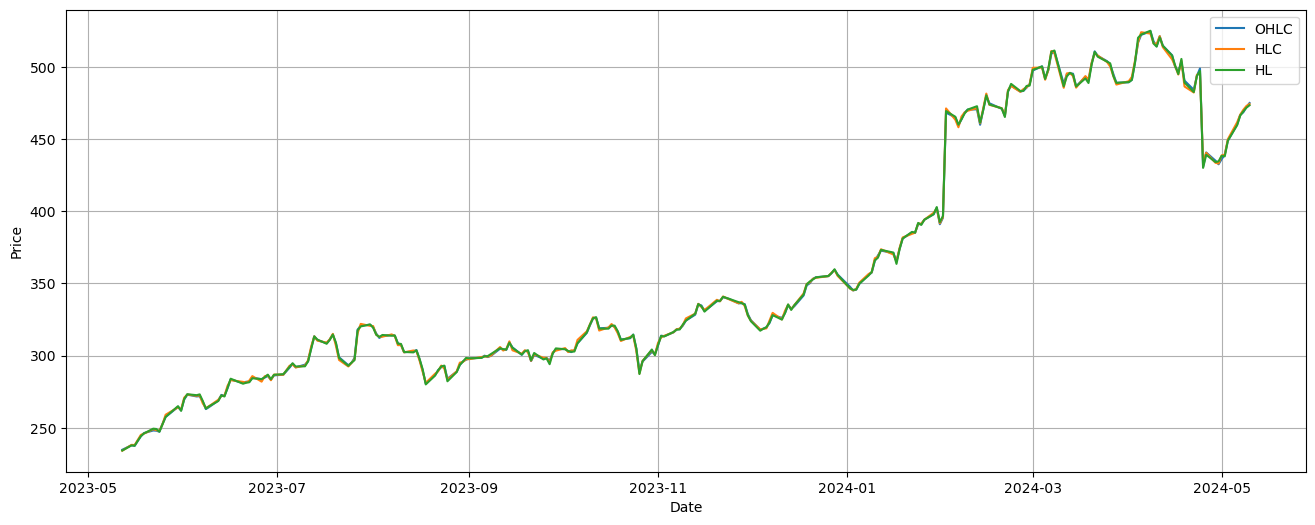

In [ ]:
# 平均価格を描画
plt.figure(figsize=(16,6))
plt.plot(df["Average_of_ohlc"], label="OHLC")
plt.plot(df["Average_of_hlc"], label="HLC")
plt.plot(df["Average_of_hl"], label="HL")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# HLバンド、中間線を作成
high = df["High"]
low = df["Low"]

# 20日のハイバンド
df["High_band"] = high.rolling(window=20).max()
# 20日のローバンド
df["Low_band"] = low.rolling(window=20).min()
# 中間線
df["Median_line"] = (df["High_band"] + df["Low_band"]) / 2

In [ ]:
# カラム(High_band、Low_band、Median_line)が作成されているか確認
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Average_of_ohlc,Average_of_hlc,Average_of_hl,High_band,Low_band,Median_line
date,,,,,,,,,,,,
2024-05-06,455.579987,466.160004,453.339996,465.679993,465.679993,15094600,460.189995,461.726664,459.750000,525.869995,414.5,470.184998
2024-05-07,466.290009,471.529999,461.309998,468.239990,468.239990,13406800,466.842499,467.026662,466.419998,523.859985,414.5,469.179993
2024-05-08,463.500000,475.579987,463.000000,472.600006,472.600006,11683900,468.669998,470.393331,469.289993,523.859985,414.5,469.179993
2024-05-09,470.000000,476.079987,467.630005,475.420013,475.420013,9437700,472.282501,473.043335,471.854996,520.190002,414.5,467.345001
2024-05-10,477.070007,477.450012,469.600006,476.200012,476.200012,10706750,475.080009,474.416677,473.525009,518.530029,414.5,466.515015


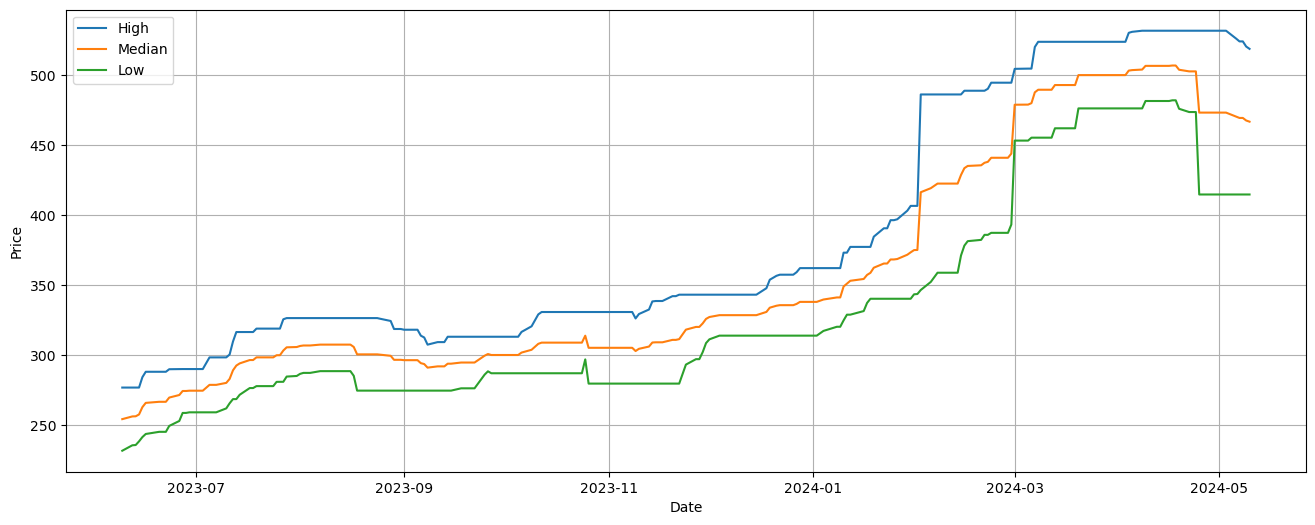

In [ ]:
# ハイバンド、ローバンド、中間線を描画
plt.figure(figsize=(16,6))
plt.plot(df["High_band"], label="High")
plt.plot(df["Median_line"], label="Median")
plt.plot(df["Low_band"], label="Low")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 20日移動平均線、200日移動平均線のカラムを作成
close = df["Close"]

# 20日移動平均線
df["Moving_average_of_20_days"] = close.rolling(window=20).mean()
# 200日移動平均線
df["Moving_average_of_200_days"] = close.rolling(window=200).mean()

In [ ]:
# カラム(moving_average_of_20_days、moving_average_of_200_days)が作成されているか確認
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Average_of_ohlc,Average_of_hlc,Average_of_hl,High_band,Low_band,Median_line,Moving_average_of_20_days,Moving_average_of_200_days
date,,,,,,,,,,,,,,
2024-05-06,455.579987,466.160004,453.339996,465.679993,465.679993,15094600,460.189995,461.726664,459.750000,525.869995,414.5,470.184998,478.306003,376.99820
2024-05-07,466.290009,471.529999,461.309998,468.239990,468.239990,13406800,466.842499,467.026662,466.419998,523.859985,414.5,469.179993,475.873001,377.86810
2024-05-08,463.500000,475.579987,463.000000,472.600006,472.600006,11683900,468.669998,470.393331,469.289993,523.859985,414.5,469.179993,473.511501,378.77305
2024-05-09,470.000000,476.079987,467.630005,475.420013,475.420013,9437700,472.282501,473.043335,471.854996,520.190002,414.5,467.345001,471.124503,379.67780
2024-05-10,477.070007,477.450012,469.600006,476.200012,476.200012,10706750,475.080009,474.416677,473.525009,518.530029,414.5,466.515015,469.339503,380.56595


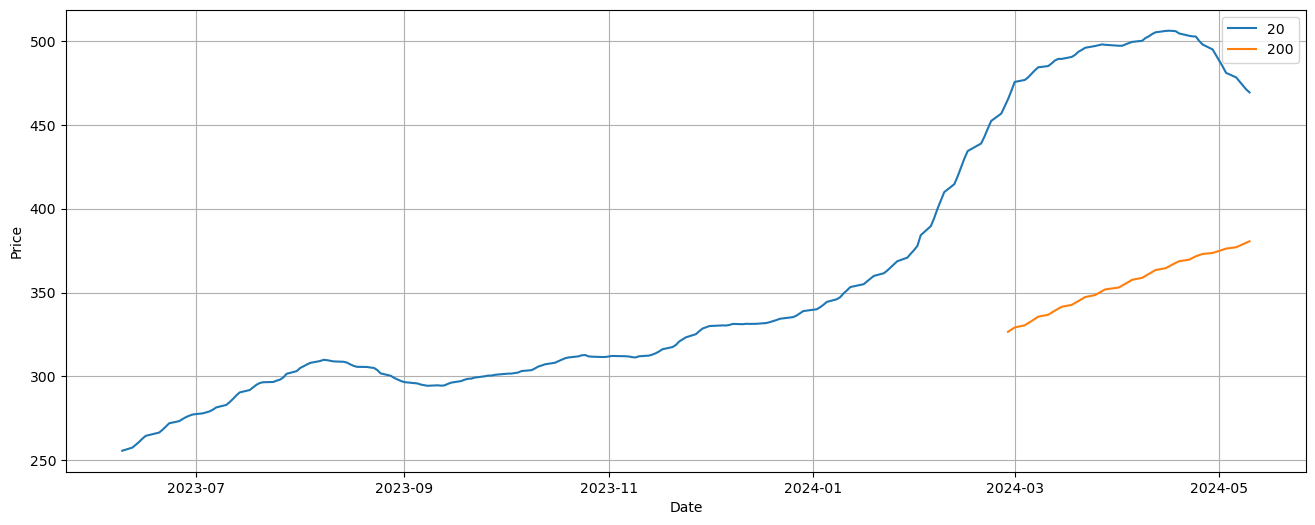

In [ ]:
# 20日移動平均線、200日移動平均線を描画
plt.figure(figsize=(16,6))
plt.plot(df["Moving_average_of_20_days"], label="20")
plt.plot(df["Moving_average_of_200_days"], label="200")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

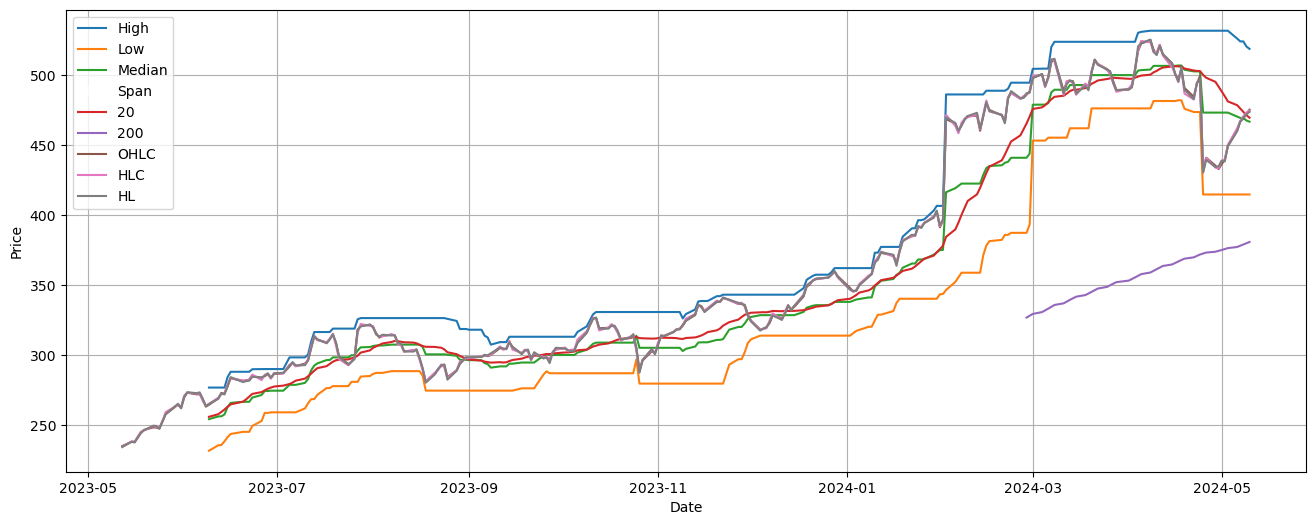

In [ ]:
# ハイバンド、ローバンド、中間線、20日移動平均線、200日移動平均線、平均価格を描画
plt.figure(figsize=(16,6))
plt.plot(df["High_band"], label="High")
plt.plot(df["Low_band"], label="Low")
plt.plot(df["Median_line"], label="Median")
plt.fill_between(date, df["High_band"], df["Low_band"], facecolor="white", alpha=0.5, label="Span")
plt.plot(df["Moving_average_of_20_days"], label="20")
plt.plot(df["Moving_average_of_200_days"], label="200")
plt.plot(df["Average_of_ohlc"], label="OHLC")
plt.plot(df["Average_of_hlc"], label="HLC")
plt.plot(df["Average_of_hl"], label="HL")
plt.xlabel("Date")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# データフレームをExcelに出力
df.to_excel(ticker_symbol + "_hl_band_and_moving_average.xlsx")

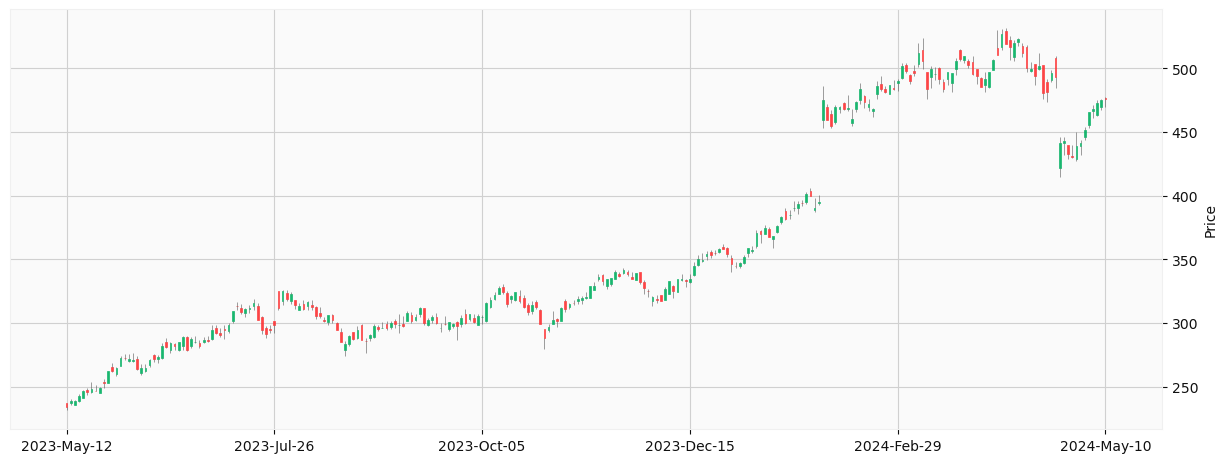

In [ ]:
# ローソク足を描画
mpf.plot(df, type="candle", figsize=(16,6), style="yahoo", xrotation=0)

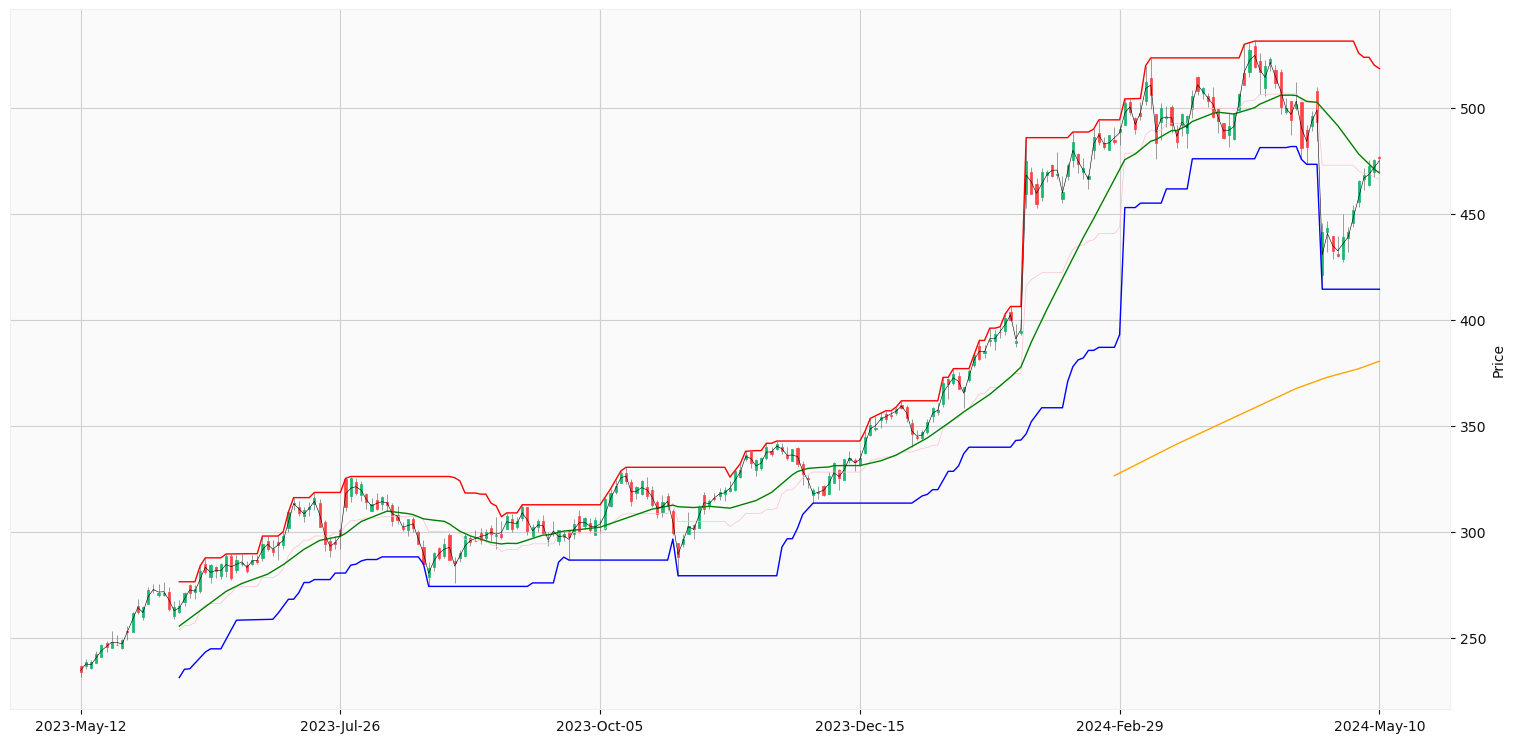

In [ ]:
# ローソク足、HLバンド、移動平均線、平均価格を描画する
lines = [
    mpf.make_addplot(df["High_band"], color="red", width=1.0),
    mpf.make_addplot(df["Median_line"], color="pink", width=0.5),
    mpf.make_addplot(df["Low_band"], color="blue", width=1.0),
    mpf.make_addplot(df["Moving_average_of_20_days"], color="green", width=1.0),
    mpf.make_addplot(df["Moving_average_of_200_days"], color="orange", width=1.0),
    mpf.make_addplot(df["Average_of_ohlc"], color="black", width=0.4)
]

labels = ["High", "Median", "Low", "200", "Ohlc"]
# labels = ["High", "Median", "Low", "20", "200", "Ohlc"]

fig, ax = mpf.plot(df, type="candle", figsize=(20,10), style="yahoo", xrotation=0, addplot=lines, returnfig=True)
# 描画せずグラフを保存する場合
# fig, ax = mpf.plot(df, type="candle", figsize=(20,10), style="yahoo", xrotation=0, addplot=lines, returnfig=True, savefig=ticker_symbol + ".png")

plt.show()

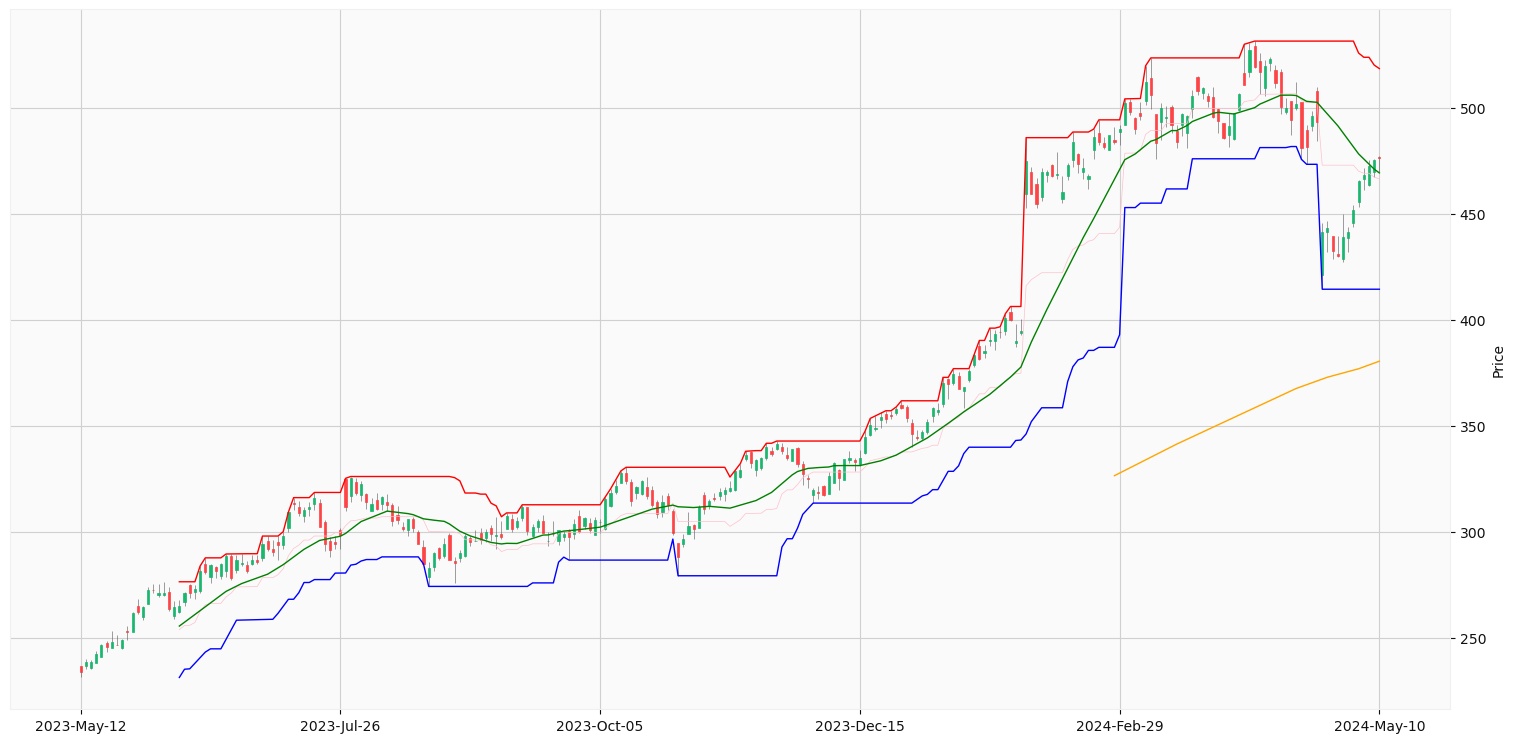

In [ ]:
# ローソク足、HLバンド、移動平均線を描画する
lines = [
    mpf.make_addplot(df["High_band"], color="red", width=1.0),
    mpf.make_addplot(df["Median_line"], color="pink", width=0.5),
    mpf.make_addplot(df["Low_band"], color="blue", width=1.0),
    mpf.make_addplot(df["Moving_average_of_20_days"], color="green", width=1.0),
    mpf.make_addplot(df["Moving_average_of_200_days"], color="orange", width=1.0)
]

# labels = ["High", "Median", "Low", "200"]
labels = ["High", "Median", "Low", "20", "200"]

fig, ax = mpf.plot(df, type="candle", figsize=(20,10), style="yahoo", xrotation=0, addplot=lines, returnfig=True)
# 描画せずグラフを保存する場合
# fig, ax = mpf.plot(df, type="candle", figsize=(20,10), style="yahoo", xrotation=0, addplot=lines, returnfig=True, savefig=ticker_symbol + ".png")

plt.show()

複数の銘柄の場合

In [ ]:
# ライブラリをインポート
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mplfinance as mpf
import yfinance as yf
from pandas_datareader import data as pdr
import datetime

In [ ]:
# 銘柄のチャートを作成する関数
def create_chart(ticker_symbol, past_date, today):
    # データを取得 (日付、始値、高値、安値、終値、調整終値、出来高)
    data = pdr.get_data_yahoo(ticker_symbol, start=str(past_date), end=str(today))

    # データコピーして、データフレームに設定
    df = data.copy()

    # インデックスを日付に指定
    date = df.index

    # 日付を昇順に並び替える
    df.sort_index(inplace=True)

    # 始値、高値、安値、終値の平均価格のカラム
    df["Average_of_ohlc"] = (df["Open"] + df["High"] + df["Low"] + df["Close"]) / 4

    # 高値、安値、終値の平均価格のカラム
    df["Average_of_hlc"] = (df["High"] + df["Low"] + df["Close"]) / 3

    # 高値、安値の平均価格のカラム
    df["Average_of_hl"] = (df["High"] + df["Low"]) / 2

    # HLバンド、中間線を作成
    high = df["High"]
    low = df["Low"]

    # 20日のハイバンド
    df["High_band"] = high.rolling(window=20).max()
    # 20日のローバンド
    df["Low_band"] = low.rolling(window=20).min()
    # 中間線
    df["Median_line"] = (df["High_band"] + df["Low_band"]) / 2

    # 20日移動平均線、200日移動平均線のカラムを作成
    close = df["Close"]

    # 20日移動平均線
    df["Moving_average_of_20_days"] = close.rolling(window=20).mean()
    # 200日移動平均線
    df["Moving_average_of_200_days"] = close.rolling(window=200).mean()

    # ローソク足、HLバンド、移動平均線、平均価格を描画する
    lines = [
        mpf.make_addplot(df["High_band"], color="red", width=1.0),
        mpf.make_addplot(df["Median_line"], color="pink", width=0.5),
        mpf.make_addplot(df["Low_band"], color="blue", width=1.0),
        mpf.make_addplot(df["Moving_average_of_20_days"], color="green", width=1.0),
        mpf.make_addplot(df["Moving_average_of_200_days"], color="orange", width=1.0),
        mpf.make_addplot(df["Average_of_ohlc"], color="black", width=0.4)
    ]

    labels = ["High", "Median", "Low", "20", "200", "Ohlc"]

    fig, ax = mpf.plot(df, type="candle", figsize=(20,10), style="yahoo", xrotation=0, addplot=lines, returnfig=True, savefig=ticker_symbol + "_chart.png")

In [ ]:
# 銘柄のHLバンド、移動平均線のExcelを作成する関数
def create_hl_band_and_moving_average(ticker_symbol, past_date, today):
    # データを取得 (日付、始値、高値、安値、終値、調整終値、出来高)
    data = pdr.get_data_yahoo(ticker_symbol, start=str(past_date), end=str(today))

    # データコピーして、データフレームに設定
    df = data.copy()

    # インデックスを日付に指定
    date = df.index

    # 日付を昇順に並び替える
    df.sort_index(inplace=True)

    # 始値、高値、安値、終値の平均価格のカラム
    df["Average_of_ohlc"] = (df["Open"] + df["High"] + df["Low"] + df["Close"]) / 4

    # 高値、安値、終値の平均価格のカラム
    df["Average_of_hlc"] = (df["High"] + df["Low"] + df["Close"]) / 3

    # 高値、安値の平均価格のカラム
    df["Average_of_hl"] = (df["High"] + df["Low"]) / 2

    # HLバンド、中間線を作成
    high = df["High"]
    low = df["Low"]

    # 20日のハイバンド
    df["High_band"] = high.rolling(window=20).max()
    # 20日のローバンド
    df["Low_band"] = low.rolling(window=20).min()
    # 中間線
    df["Median_line"] = (df["High_band"] + df["Low_band"]) / 2

    # 20日移動平均線、200日移動平均線のカラムを作成
    close = df["Close"]

    # 20日移動平均線
    df["Moving_average_of_20_days"] = close.rolling(window=20).mean()
    # 200日移動平均線
    df["Moving_average_of_200_days"] = close.rolling(window=200).mean()

    # データフレームをExcelに出力
    data_frame = df.to_excel(ticker_symbol + "_hl_band_and_moving_average_and_average_price.xlsx")

    return data_frame

In [ ]:
# Yahoo!ファイナンスのデータをpandas-datareaderで扱う
yf.pdr_override()

In [ ]:
# 米国株のシンボルのリスト (マグニフィセント・セブン)
symbols_list = [
    "AAPL",
    "AMZN",
    "GOOGL",
    "META",
    "MSFT",
    "NVDA",
    "TSLA"
]

In [ ]:
# 今日の日付を取得
today = datetime.date.today()

# 過去365日前の日付を取得
past_date = today - datetime.timedelta(days=365)

# 今日の日付を確認
print("Today:", today)

# 過去365日前の日付を確認
print("Past date:", past_date)

Today: 2024-05-06
Past date: 2023-05-07


In [ ]:
# リストにあるシンボルのチャートを作成
for ticker_symbol in symbols_list:
    chart = create_chart(ticker_symbol, past_date, today)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# リストにあるシンボルのExcelを作成
for ticker_symbol in symbols_list:
    result = create_hl_band_and_moving_average(ticker_symbol, past_date, today)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
